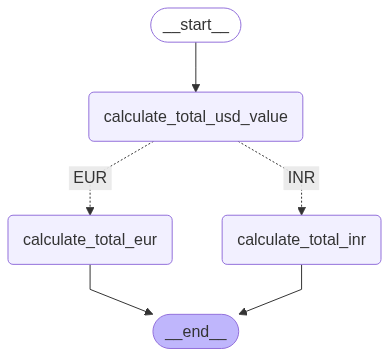

{'usd_value': 1000,
 'total_usd_value': 40000,
 'currency': 'EUR',
 'total_value': 280000}

In [9]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class Portfolio(TypedDict):
    usd_value: float
    total_usd_value: float
    currency: Literal[ "INR", "EUR" ]
    total_value: float


def calculate_total_usd_value(portfolio: Portfolio) -> Portfolio :
    portfolio['total_usd_value'] = portfolio['usd_value'] * 40
    return portfolio

def calculate_total_inr(portfolio: Portfolio) -> Portfolio :
    portfolio['total_value'] = portfolio['total_usd_value'] * 85
    return portfolio

def calculate_total_eur(portfolio: Portfolio) -> Portfolio :
    portfolio['total_value'] = portfolio['total_usd_value'] * 7
    return portfolio

def router(state: Portfolio) -> str :
    return state['currency']

portfolio1 = StateGraph(Portfolio)


portfolio1.add_node("calculate_total_usd_value", calculate_total_usd_value)
portfolio1.add_node("calculate_total_inr", calculate_total_inr)
portfolio1.add_node("calculate_total_eur", calculate_total_eur)

portfolio1.add_edge(START, "calculate_total_usd_value")
portfolio1.add_conditional_edges("calculate_total_usd_value", router, {
    "INR": "calculate_total_inr",
    "EUR": "calculate_total_eur"
})
portfolio1.add_edge("calculate_total_inr", END)
portfolio1.add_edge("calculate_total_eur", END)

# build the graph
graph = portfolio1.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"usd_value": 1000, "currency": "INR"})
graph.invoke({"usd_value": 1000, "currency": "EUR"})

